## Load and encode data

In [3]:
import pandas as pd
import sys
from tqdm import tqdm
sys.path.append("../")
from tcad.deep.fit import train_encoder
from tcad.tools.nntools import SmilesDataSet
from tcad.deep.models import CNNAutoEncoder
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv("../data/androgen_data.csv")
smiles = data["canonical_smiles"].to_list()

In [5]:
smiles_dataset = SmilesDataSet(smiles)

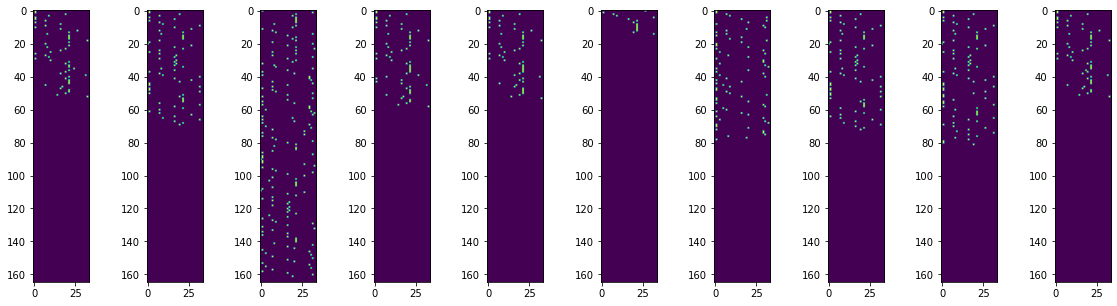

In [6]:
_, ax = plt.subplots(1, 10, figsize = (20, 5))
for i in range(10):
    ax[i].imshow(smiles_dataset[i].squeeze())

In [7]:
dataloader = DataLoader(smiles_dataset, batch_size=64)

In [8]:
model = CNNAutoEncoder(256)

In [9]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()

In [10]:
losses = []
for i in tqdm(range(5)):
    losses.append(train_encoder(model, dataloader, optimizer, criterion))

100%|██████████| 5/5 [00:45<00:00,  9.20s/it]


In [16]:
in_data = next(iter(dataloader))
out = model(in_data).detach().cpu().numpy().squeeze()

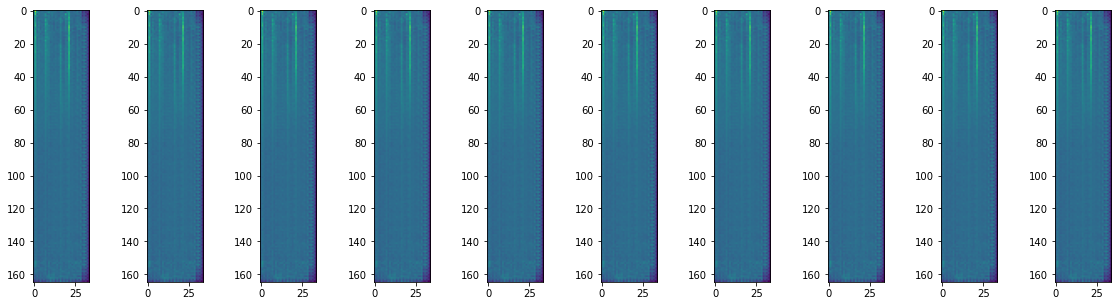

In [17]:
_, ax = plt.subplots(1, 10, figsize = (20, 5))
for i in range(10):
    ax[i].imshow(out[i])

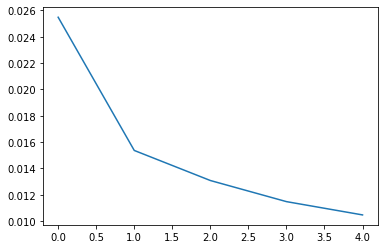

In [18]:
plt.plot(losses)

In [19]:
out[0]

array([[ 0.15612489,  0.41577694,  0.01269913, ..., -0.13405065,
        -0.14739978, -0.21573046],
       [-0.01968731,  0.22124848,  0.08561671, ..., -0.15285924,
        -0.12078451, -0.21573046],
       [ 0.05354032,  0.25882736, -0.05529708, ..., -0.08792818,
        -0.18948084, -0.21573046],
       ...,
       [ 0.0020155 , -0.03824612, -0.03052576, ..., -0.08676067,
        -0.16636424, -0.21573046],
       [-0.09280353, -0.06928942, -0.02813792, ..., -0.15882093,
        -0.12532124, -0.21573046],
       [-0.1412939 , -0.12454311, -0.09538817, ..., -0.15747833,
        -0.2307439 , -0.21573046]], dtype=float32)

In [20]:
torch.cuda.is_available()

False